In [1]:
import pandas as pd
import numpy as np

# Load the datasets
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# Print the size of the dataset
print("test dataset size: ", len(test_df))
print("train dataset size: ", len(train_df))

# Print the sentiment distribution
print("Sentiment distribution for test: ")
print(test_df["Sentiment"].value_counts())
      
print("Sentiment distribution for train: ")
print(train_df["Sentiment"].value_counts())

# Check for missing values
print("Missing values in test: ")
print(test_df.isnull().sum())
      
print("Missing values in train: ")
print(train_df.isnull().sum())
      


test dataset size:  359
train dataset size:  1048575
Sentiment distribution for test: 
1    182
0    177
Name: Sentiment, dtype: int64
Sentiment distribution for train: 
0    800000
1    248575
Name: Sentiment, dtype: int64
Missing values in test: 
Index        0
Sentiment    0
Text         0
dtype: int64
Missing values in train: 
Index        0
Sentiment    0
Text         0
dtype: int64


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')

# Load the datasets
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# Define a function for text preprocessing
def preprocess_text(text):
    # Change all letters to lowercase
    text = text.lower()
    # Remove digits and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return " ".join(tokens)

# Apply text preprocessing
test_df['Text'] = test_df['Text'].apply(preprocess_text)
train_df['Text'] = train_df['Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tklut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Make a subset of train.csv so the computer can run it
train_subset=train_df.sample(n=5000, random_state=42)

# Extract BOW features
bow_vectorizer = CountVectorizer()
bow_train_features = bow_vectorizer.fit_transform(train_subset['Text'])
bow_test_features = bow_vectorizer.transform(test_df['Text'])
print(bow_test_features.toarray())

# Extract tfidf features
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_features = tfidf_vectorizer.fit_transform(train_subset['Text'])
tfidf_test_features = tfidf_vectorizer.transform(test_df['Text'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Define the models
lr_model = LogisticRegression()
neigh_model = KNeighborsClassifier(n_neighbors=3)
svc_model = SVC(probability=True)
rfc_model = RandomForestClassifier()

# Apply model to BOW
lr_model.fit(bow_train_features, train_subset['Sentiment'])
neigh_model.fit(bow_train_features, train_subset['Sentiment'])
svc_model.fit(bow_train_features, train_subset['Sentiment'])
rfc_model.fit(bow_train_features, train_subset['Sentiment'])

# Apply model to tfidf
lr_model.fit(tfidf_train_features, train_subset['Sentiment'])
neigh_model.fit(tfidf_train_features, train_subset['Sentiment'])
svc_model.fit(tfidf_train_features, train_subset['Sentiment'])
rfc_model.fit(tfidf_train_features, train_subset['Sentiment'])

RandomForestClassifier()

In [19]:
# Predict BOW
lr_bow_test_preds = lr_model.predict(bow_test_features)
lr_bow_test_preds_proba = lr_model.predict_proba(bow_test_features)
neigh_bow_test_preds = neigh_model.predict(bow_test_features)
neigh_bow_test_preds_proba = neigh_model.predict_proba(bow_test_features)
svc_bow_test_preds = svc_model.predict(bow_test_features)
svc_bow_test_preds_proba = svc_model.predict_proba(bow_test_features)
rfc_bow_test_preds = rfc_model.predict(bow_test_features)
rfc_bow_test_preds_proba = rfc_model.predict_proba(bow_test_features)

# Predict tfidf
lr_tfidf_test_preds = lr_model.predict(tfidf_test_features)
lr_tfidf_test_preds_proba = lr_model.predict_proba(tfidf_test_features)
neigh_tfidf_test_preds = lr_model.predict(tfidf_test_features)
neigh_tfidf_test_preds_proba = neigh_model.predict_proba(tfidf_test_features)
svc_tfidf_test_preds = lr_model.predict(tfidf_test_features)
svc_tfidf_test_preds_proba = svc_model.predict_proba(tfidf_test_features)
rfc_tfidf_test_preds = lr_model.predict(tfidf_test_features)
rfc_tfidf_test_preds_proba = rfc_model.predict_proba(tfidf_test_features)

              precision    recall  f1-score   support

           0       0.59      0.92      0.72       177
           1       0.83      0.38      0.52       182

    accuracy                           0.65       359
   macro avg       0.71      0.65      0.62       359
weighted avg       0.71      0.65      0.62       359

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       177
           1       1.00      0.01      0.02       182

    accuracy                           0.50       359
   macro avg       0.75      0.51      0.34       359
weighted avg       0.75      0.50      0.34       359

              precision    recall  f1-score   support

           0       0.57      0.82      0.67       177
           1       0.70      0.41      0.51       182

    accuracy                           0.61       359
   macro avg       0.64      0.61      0.59       359
weighted avg       0.64      0.61      0.59       359



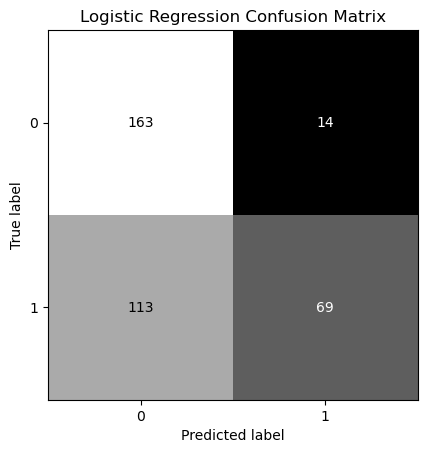

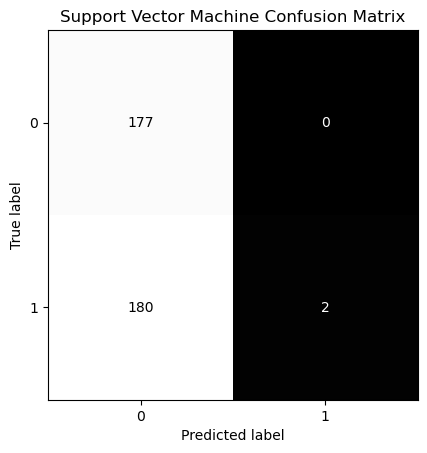

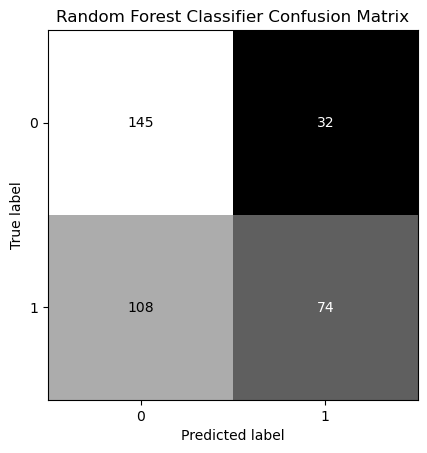

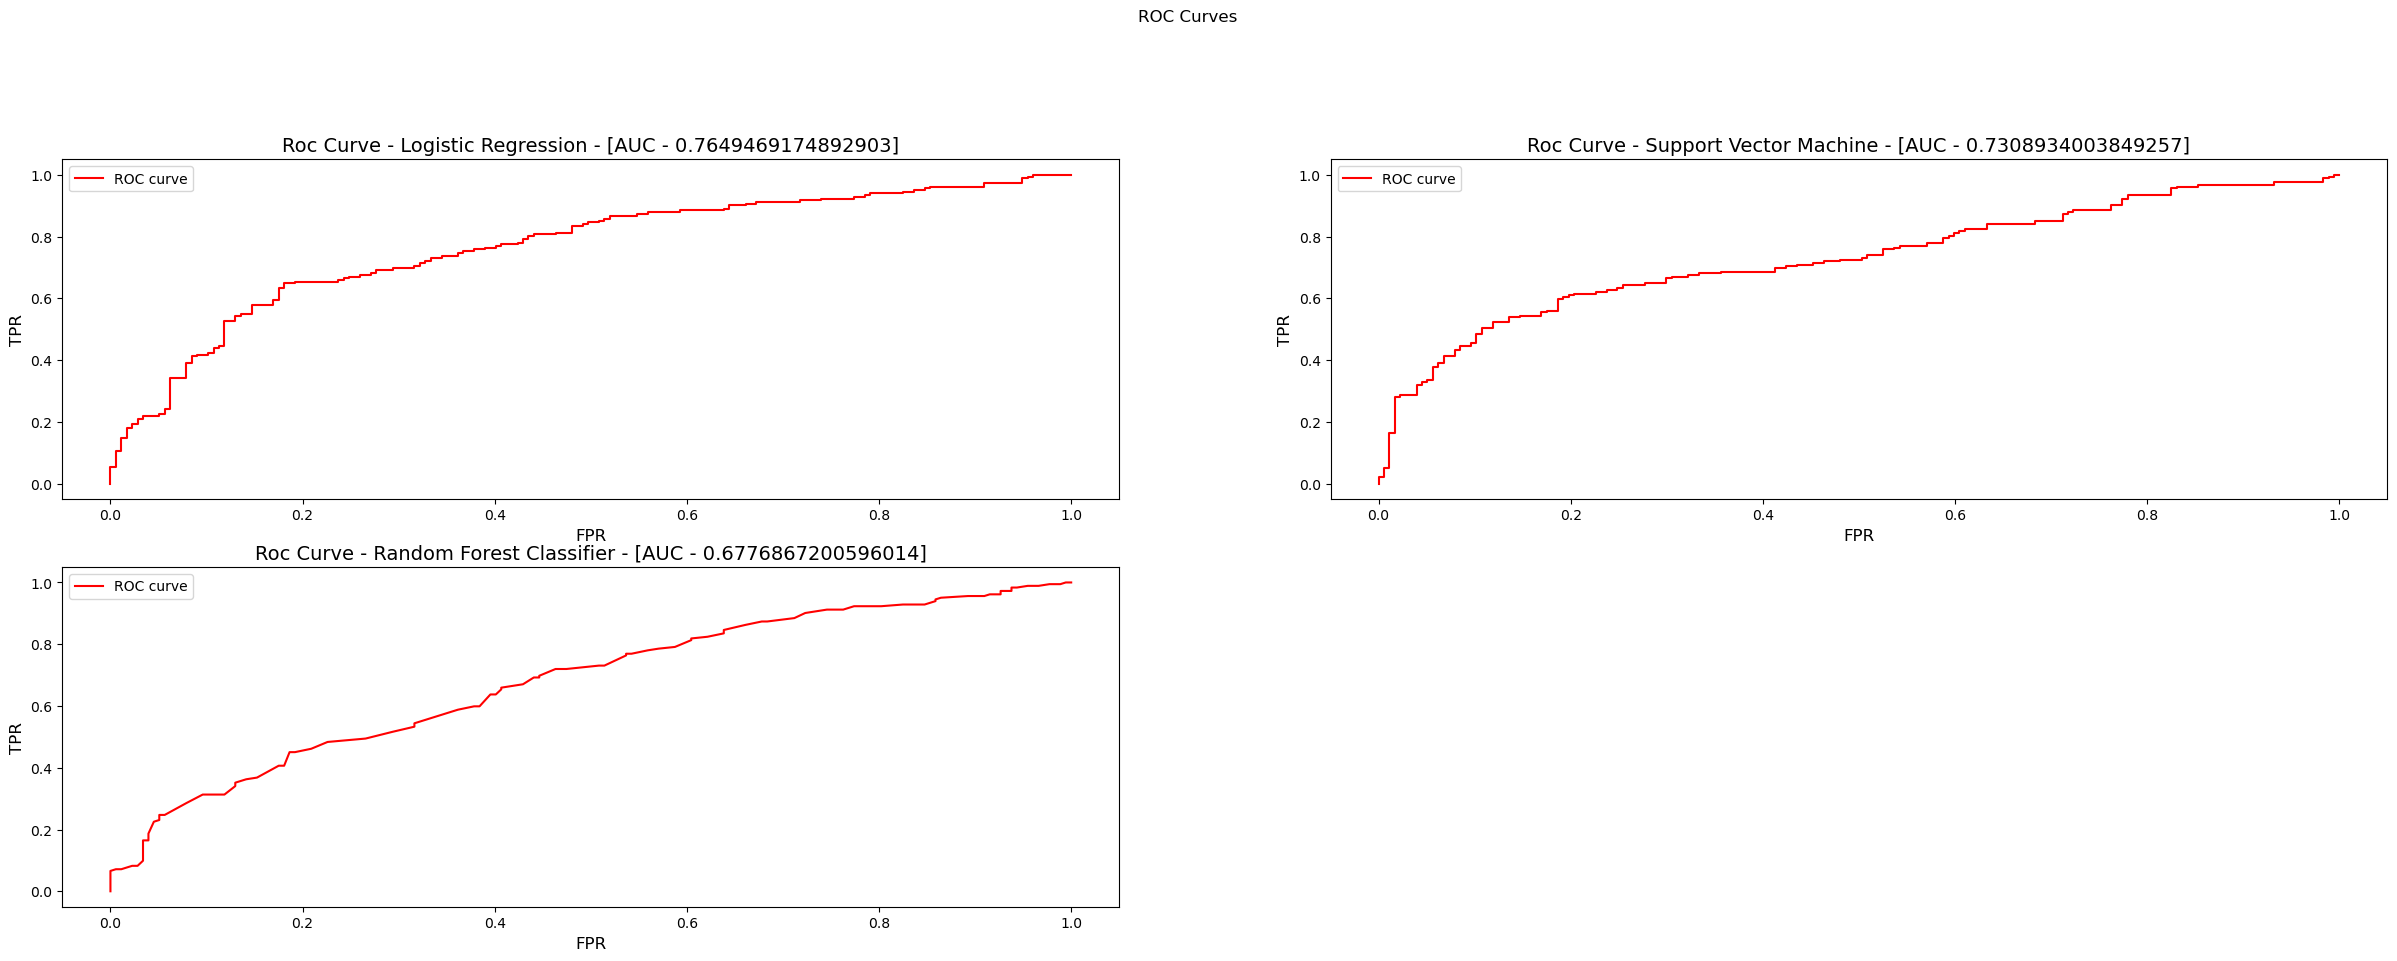

In [20]:
print(classification_report(test_df['Sentiment'], lr_bow_test_preds))
print(classification_report(test_df['Sentiment'], svc_bow_test_preds))
print(classification_report(test_df['Sentiment'], rfc_bow_test_preds))

models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [lr_bow_test_preds, svc_bow_test_preds, rfc_bow_test_preds]
pred_probabilities = [lr_bow_test_preds_proba, svc_bow_test_preds_proba, rfc_bow_test_preds_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(test_df['Sentiment'].ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(test_df['Sentiment'], pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       177
           1       1.00      0.03      0.06       182

    accuracy                           0.51       359
   macro avg       0.75      0.52      0.37       359
weighted avg       0.75      0.51      0.36       359

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       177
           1       1.00      0.03      0.06       182

    accuracy                           0.51       359
   macro avg       0.75      0.52      0.37       359
weighted avg       0.75      0.51      0.36       359

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       177
           1       1.00      0.03      0.06       182

    accuracy                           0.51       359
   macro avg       0.75      0.52      0.37       359
weighted avg       0.75      0.51      0.36       359



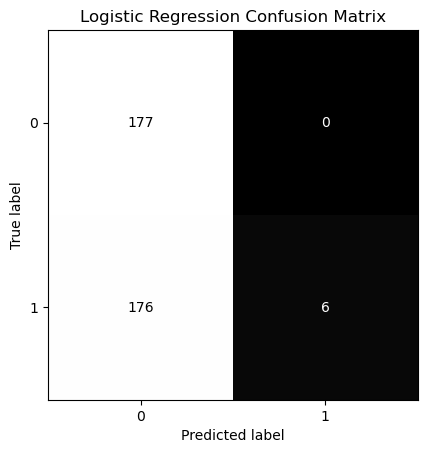

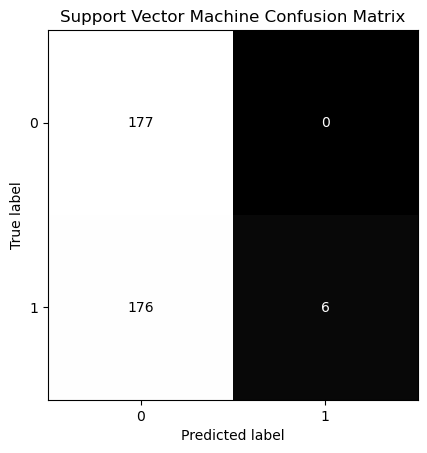

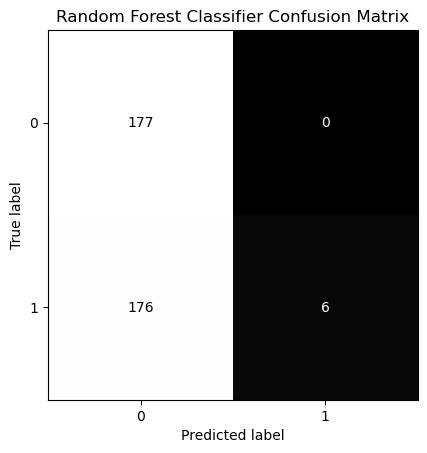

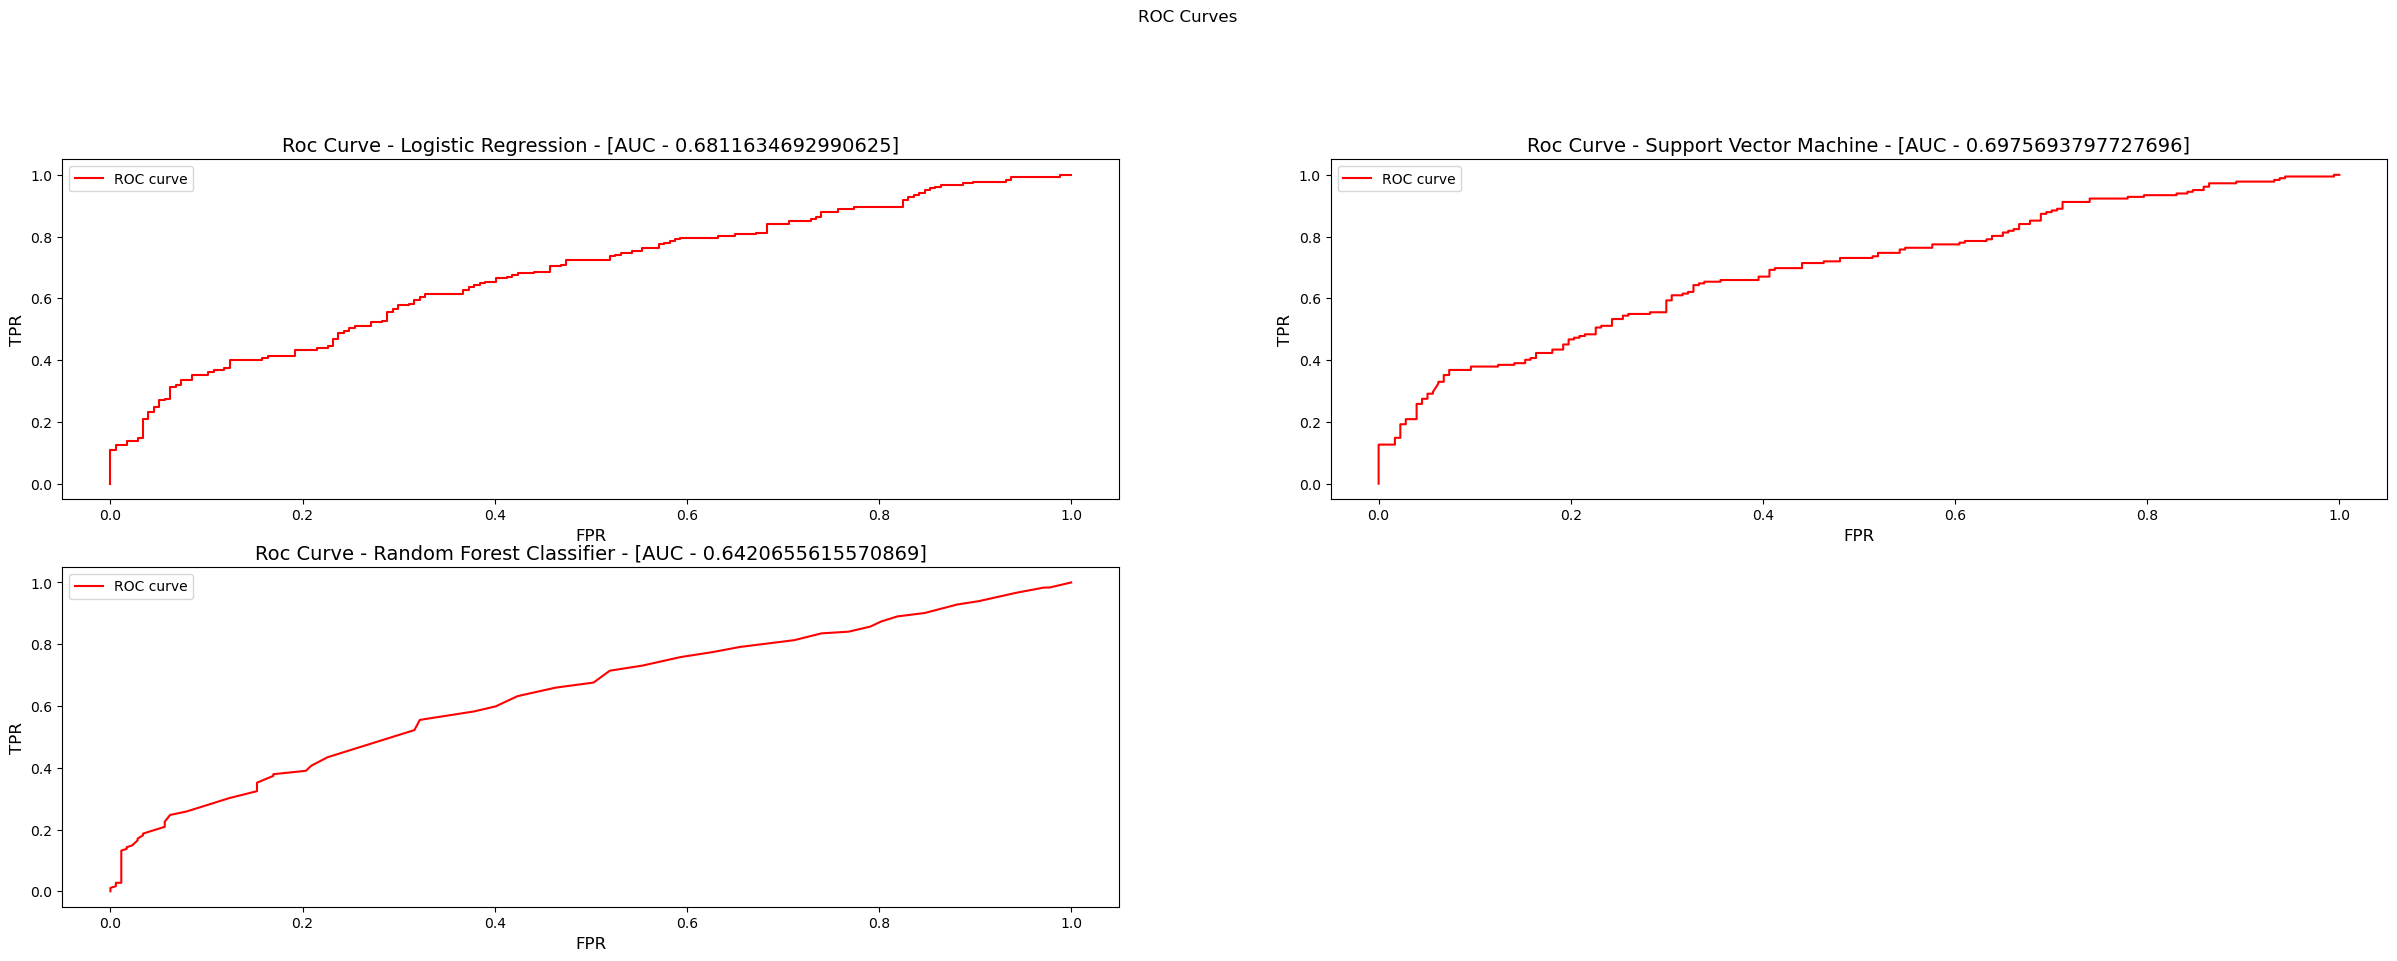

In [16]:
print(classification_report(test_df['Sentiment'], lr_tfidf_test_preds))
print(classification_report(test_df['Sentiment'], svc_tfidf_test_preds))
print(classification_report(test_df['Sentiment'], rfc_tfidf_test_preds))

models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [lr_tfidf_test_preds, svc_tfidf_test_preds, rfc_tfidf_test_preds]
pred_probabilities = [lr_tfidf_test_preds_proba, svc_tfidf_test_preds_proba, rfc_tfidf_test_preds_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(test_df['Sentiment'].ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(test_df['Sentiment'], pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()